# Análise e Classificação de Aprovação de Empréstimos com Modelos de Machine Learning

Este estudo utiliza o conjunto de dados **Loan Approval Dataset**, composto por **2.000 registros** e **8 variáveis**, com o objetivo de analisar **fatores financeiros e profissionais** que influenciam a aprovação de solicitações de empréstimos.  

O dataset contém variáveis como **renda anual (income)**, **pontuação de crédito (credit_score)**, **valor do empréstimo solicitado (loan_amount)**, **anos de emprego (years_employed)** e uma métrica adicional denominada **points**, que representa a pontuação de avaliação do solicitante.  
A variável-alvo **loan_approved** é booleana, indicando se o empréstimo foi **aprovado (True)** ou **rejeitado (False)**.

---

### Objetivos

- Realizar **análise exploratória de dados (EDA)** para identificar padrões entre renda, pontuação de crédito e aprovação de empréstimos.  
- Aplicar e comparar **modelos de classificação supervisionada**, incluindo **Logistic Regression**, **Decision Tree**, **Random Forest**, **SVM**, **KNN** e **XGBoost**.  
- Avaliar o desempenho dos modelos com base nas métricas **Acurácia**, **Precisão**, **Recall**, **F1-Score** e **Matriz de Confusão**.  
- Determinar os **atributos mais relevantes** na decisão de aprovação, como renda, pontuação de crédito e tempo de emprego.  
- Desenvolver um **modelo preditivo confiável e interpretável** para suporte a decisões financeiras.

---

### Metodologia

- **Pré-processamento dos dados:**  
  - Verificação de valores ausentes e duplicados.  
  - Padronização dos tipos de dados e normalização das variáveis numéricas.  
  - Conversão da variável alvo *loan_approved* em formato binário (0 e 1).  
  - Divisão dos dados em **treino (70%)** e **teste (30%)** utilizando `train_test_split`.  

- **Análise exploratória:**  
  - Visualização das distribuições de **income**, **credit_score** e **loan_amount** com **Seaborn** e **Matplotlib**.  
  - Análise de **correlação** entre variáveis financeiras e a variável alvo.  
  - Identificação de **outliers** e padrões de aprovação.  

- **Modelagem preditiva:**  
  - Implementação dos modelos:  
    - **Logistic Regression**  
    - **Decision Tree**  
    - **Random Forest**  
    - **SVM (Support Vector Machine)**  
    - **K-Nearest Neighbors (KNN)**  
    - **XGBoost**  
  - Treinamento supervisionado para prever a variável *loan_approved*.  
  - Aplicação de **validação cruzada (cross-validation)** para verificar a robustez dos modelos.  

- **Avaliação dos modelos:**  
  - Cálculo das métricas **Acurácia**, **Precisão**, **Recall**, **F1-Score** e **Relatório de Classificação**.  
  - Comparação de desempenho entre os modelos, destacando o mais eficiente e estável.  

---

### Resultados e Discussão

A análise dos dados indicou uma **forte correlação entre credit_score e aprovação de empréstimos**, além de uma influência positiva da **renda (income)** e dos **anos de emprego (years_employed)**.  
Os modelos de **ensemble**, como **Random Forest** e **XGBoost**, apresentaram **melhor desempenho preditivo**, superando algoritmos lineares como a Regressão Logística em termos de acurácia e recall.  

A **Regressão Logística** destacou-se pela **interpretabilidade dos coeficientes**, permitindo compreender o peso de cada variável na decisão.  
Esses resultados sugerem que **abordagens baseadas em florestas e boosting** são mais adequadas para este tipo de dado heterogêneo.

---

### Conclusão

Os resultados obtidos demonstram que **modelos de aprendizado de máquina** são ferramentas eficazes para apoiar o processo de **avaliação e concessão de crédito**.  
A combinação de múltiplos algoritmos e métricas possibilitou identificar as variáveis mais influentes na aprovação de empréstimos e desenvolver um modelo **robusto e escalável**.  

O estudo reforça a importância da **inteligência artificial no setor financeiro**, promovendo decisões **mais rápidas, precisas e transparentes**.


# Loan Approval Dataset

O conjunto de dados utilizado neste estudo refere-se a informações financeiras e profissionais de **2.000 solicitantes de empréstimos**, com o objetivo de **analisar fatores que influenciam a aprovação de crédito** com base em renda, pontuação de crédito e histórico de emprego.

Ele é composto por **8 colunas principais**, descritas a seguir:

**Fonte:** [Kaggle – Loan Approval Dataset](https://www.kaggle.com/datasets/anishdevedward/loan-approval-dataset)

---

## Descrição das Colunas

- **name:** nome do solicitante (identificação única).  
- **city:** cidade de residência do solicitante.  
- **income:** renda anual declarada (em dólares).  
- **credit_score:** pontuação de crédito do solicitante.  
- **loan_amount:** valor solicitado no empréstimo.  
- **years_employed:** tempo de emprego atual (em anos).  
- **points:** pontuação de avaliação do solicitante, indicando o nível de risco de crédito.  
- **loan_approved:** variável-alvo indicando se o empréstimo foi aprovado (`True = aprovado`, `False = negado`).

---

## Aplicações Possíveis

Este conjunto de dados é amplamente utilizado para **estudos de modelagem preditiva e análise de risco financeiro**, permitindo:

- Aplicação de **modelos de classificação supervisionada** para prever a aprovação de empréstimos;  
- **Identificação de padrões** entre renda, pontuação de crédito e histórico profissional;  
- **Desenvolvimento de sistemas de apoio à decisão financeira**, otimizando o processo de concessão de crédito e reduzindo riscos para instituições financeiras.


In [ ]:
# Importação de Bibliotecas;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
# Carregando dados
df = pd.read_csv('/content/loan_approval.csv')

display(df)

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False
...,...,...,...,...,...,...,...,...
1995,James Schaefer,Robertton,92163,770,12251,13,85.0,True
1996,Diana Lin,New Frank,38799,635,48259,17,40.0,False
1997,Brandon Meyer,East Haley,41957,763,16752,5,60.0,True
1998,Jason Price,Adamland,139022,360,24031,35,55.0,False


# Limpeza e Pré-processamento dos Dados

In [ ]:
# Informações gerais
print("INFORMAÇÕES GERAIS")
print(df.info())
print('\n')

# Verificando dados nulos
print('Valores nulos encontrados:\n\n', df.isnull().sum())
print('\n')

# Verificando valores duplicados
print('Valores duplicados: ', df.duplicated().sum())
print('\n')

# Verificação de tipos de dados
print('Tipos de dados:\n\n', df.dtypes)
print('\n')

INFORMAÇÕES GERAIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB
None


Valores nulos encontrados:

 name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64


Valores duplicados:  0


Tipos de dados:

 name               object
city               object
income              int64
credit_score        

In [ ]:
# Análise descritiva para identificar possíveis outliers ou inconsistências nos dados
print("Análise Descritiva")
display(df.describe())

Análise Descritiva


,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


## Análise Exploratória de Dados (AED)

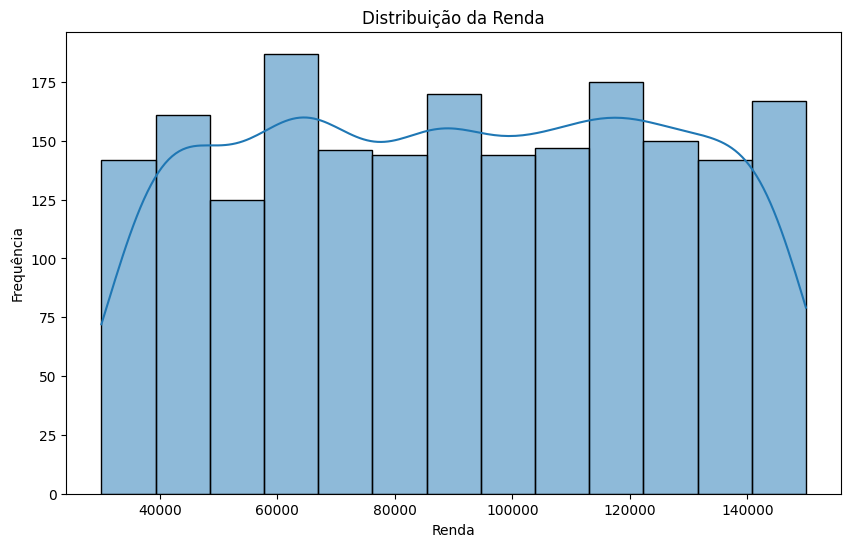

In [ ]:
# Análise da distribuição da renda
plt.figure(figsize=(10, 6))
sns.histplot(df['income'], kde=True)
plt.title('Distribuição da Renda')
plt.xlabel('Renda')
plt.ylabel('Frequência')
plt.show()


O histograma da renda (income) mostra que a distribuição da renda no conjunto de dados é aproximadamente simétrica, com a maioria dos valores concentrados em torno da média. Não parece haver valores extremos (outliers) significativos que distorçam a distribuição geral. Isso sugere que a variável renda está razoavelmente bem distribuída para análises futuras.

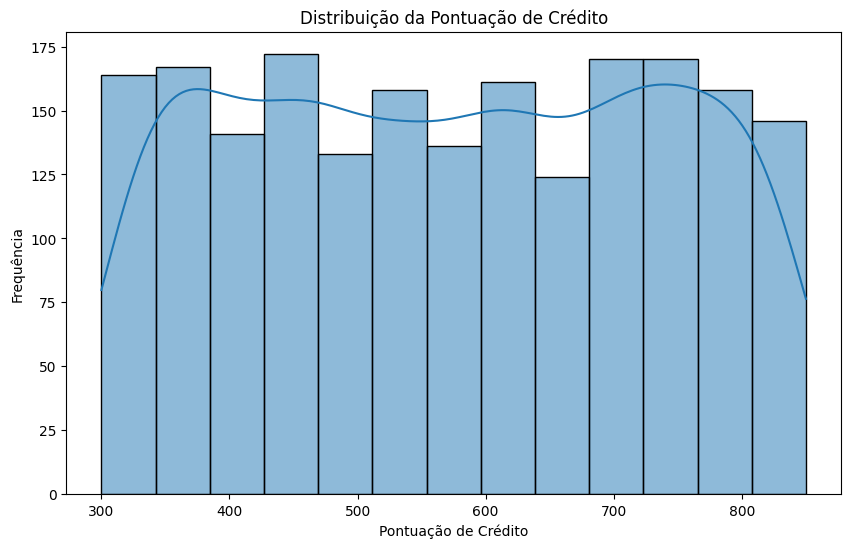

In [ ]:
# Análise da distribuição da pontuação de crédito
plt.figure(figsize=(10, 6))
sns.histplot(df['credit_score'], kde=True)
plt.title('Distribuição da Pontuação de Crédito')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Frequência')
plt.show()


O histograma da pontuação de crédito (`credit_score`) parece seguir uma distribuição mais uniforme ou levemente bimodal, com picos em torno de certas faixas de pontuação. A distribuição abrange uma ampla gama de valores, desde pontuações baixas até altas. A análise dessa distribuição é crucial, pois a pontuação de crédito geralmente é um fator determinante na aprovação de empréstimos.

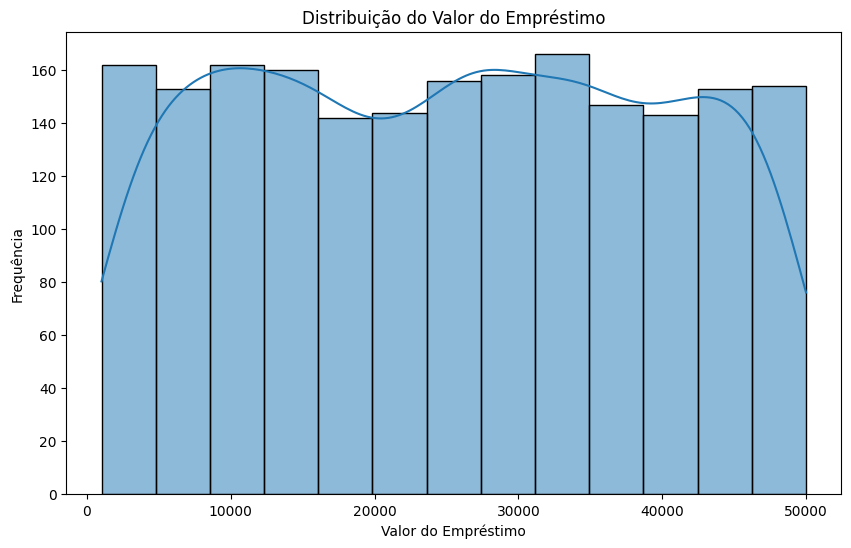

In [ ]:
# Análise da distribuição do valor do empréstimo
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], kde=True)
plt.title('Distribuição do Valor do Empréstimo')
plt.xlabel('Valor do Empréstimo')
plt.ylabel('Frequência')
plt.show()

O histograma do valor do empréstimo (`loan_amount`) mostra uma distribuição relativamente uniforme dos valores dos empréstimos solicitados, abrangendo toda a faixa de valores possíveis no dataset. Não há concentração significativa em valores específicos. Isso indica que os pedidos de empréstimo têm valores variados.

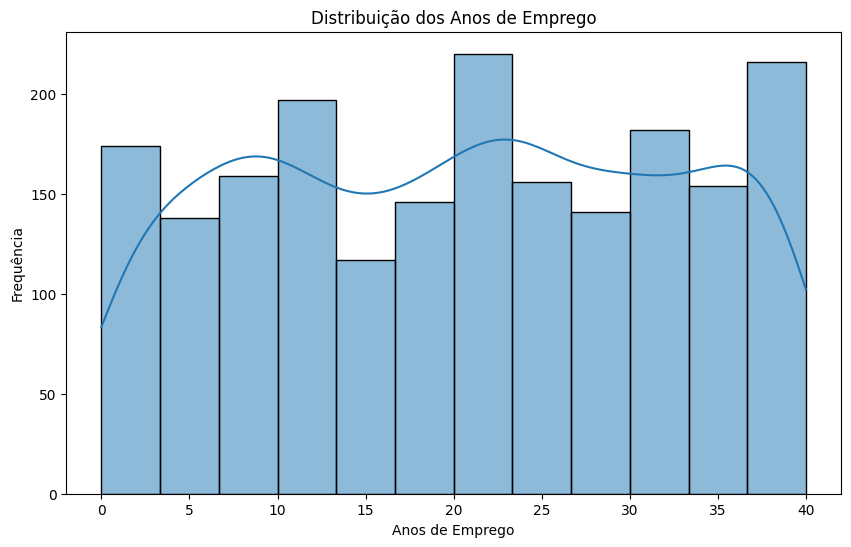

In [ ]:
# Análise da distribuição dos anos de emprego
plt.figure(figsize=(10, 6))
sns.histplot(df['years_employed'], kde=True)
plt.title('Distribuição dos Anos de Emprego')
plt.xlabel('Anos de Emprego')
plt.ylabel('Frequência')
plt.show()


O histograma dos anos de emprego (`years_employed`) mostra uma distribuição com picos em torno de certos anos de emprego, mas sem uma tendência clara de concentração em anos específicos. A distribuição abrange toda a faixa de anos de emprego.

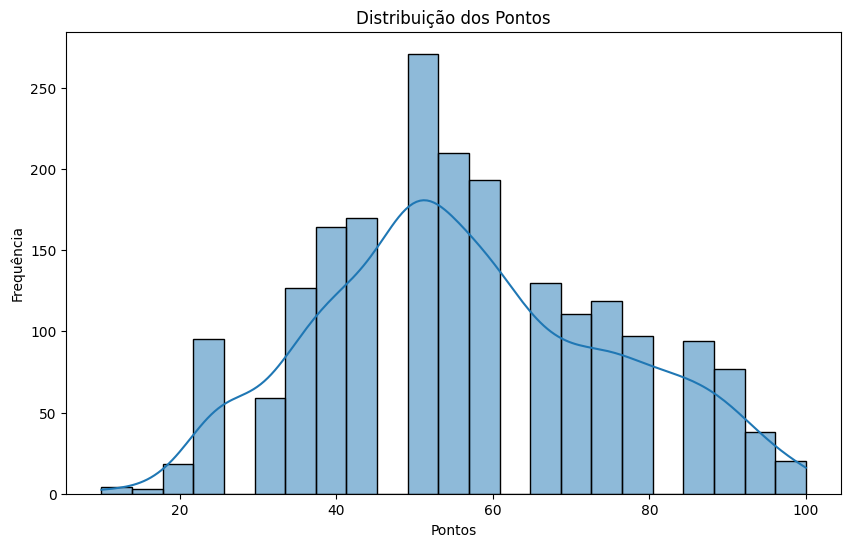

In [ ]:
# Análise da distribuição dos pontos
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], kde=True)
plt.title('Distribuição dos Pontos')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.show()

O histograma dos pontos (`points`) sugere uma distribuição com maior concentração em torno de certos valores de pontos, mas sem uma forma claramente definida (não parece normal ou uniforme). Há uma variação considerável nos pontos atribuídos. A relação entre esses pontos e a aprovação do empréstimo pode ser interessante de investigar.

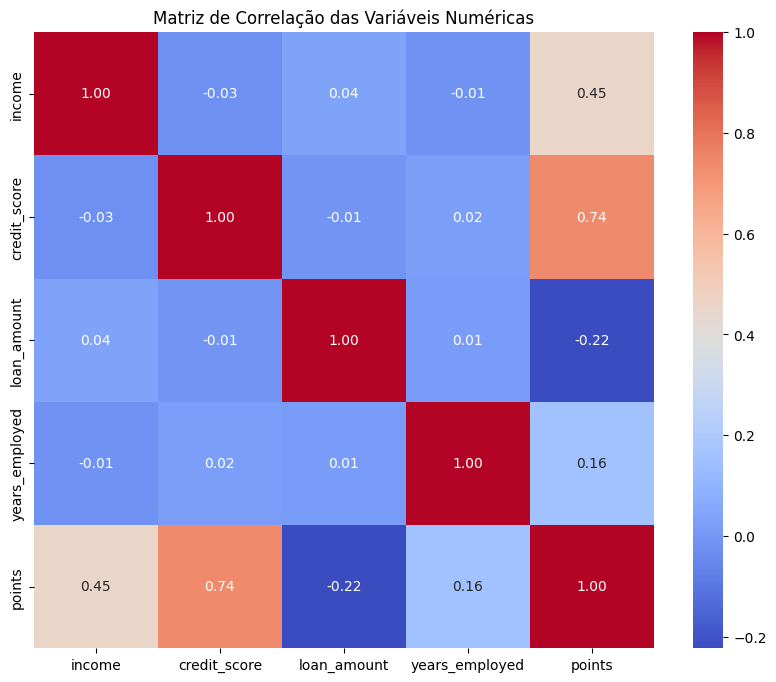

In [ ]:
# Calculando a matriz de correlação
correlation_matrix = df[['income', 'credit_score', 'loan_amount', 'years_employed', 'points']].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

A matriz de correlação visualizada revela as relações lineares entre as variáveis numéricas. Pontos notáveis incluem:
- Uma correlação positiva moderada entre `income` e `points` (~0.45), sugerindo que pessoas com maior renda tendem a ter mais pontos.
- Uma forte correlação positiva entre `credit_score` e `points` (~0.74), indicando que uma pontuação de crédito mais alta está fortemente associada a mais pontos.
- Uma correlação negativa fraca entre `loan_amount` e `points` (~-0.22), sugerindo que empréstimos de maior valor podem estar ligeiramente associados a menos pontos.
As outras correlações são fracas, indicando pouca relação linear entre os pares de variáveis.

In [ ]:
# Convertendo 'loan_approved' para numérico (False=0, True=1)
df['loan_approved_numeric'] = df['loan_approved'].astype(int)

# Calculando a correlação entre 'credit_score' e 'loan_approved'
correlation_credit_approved = df['credit_score'].corr(df['loan_approved_numeric'])

print(f"A correlação entre 'credit_score' e 'loan_approved' é: {correlation_credit_approved:.2f}")

A correlação entre 'credit_score' e 'loan_approved' é: 0.72


A correlação calculada entre credit_score e loan_approved (convertido para numérico) é de aproximadamente 0.72. Este valor positivo e relativamente alto confirma que existe uma forte relação linear positiva entre a pontuação de crédito e a aprovação do empréstimo. Quanto maior a pontuação de crédito, maior a probabilidade de o empréstimo ser aprovado.

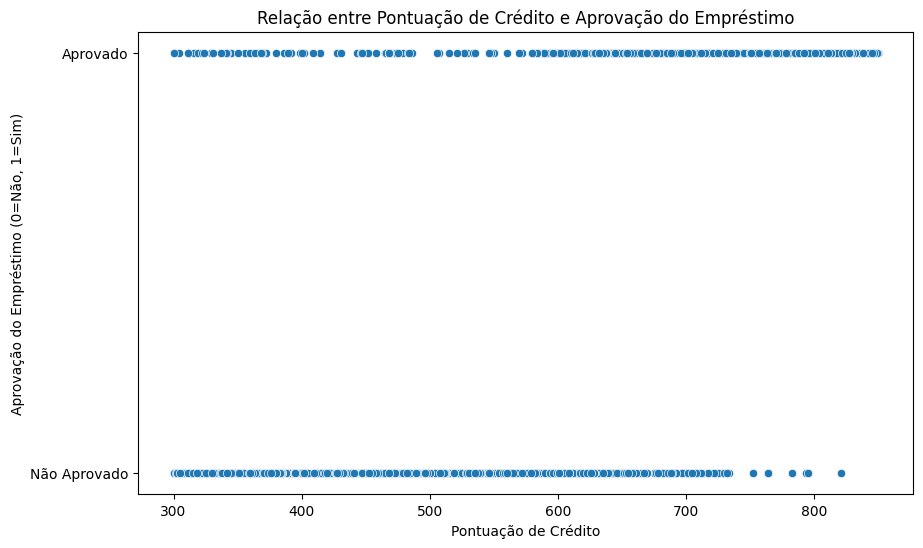

In [ ]:
# Visualizando a relação entre credit_score e loan_approved
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_score', y='loan_approved_numeric', data=df)
plt.title('Relação entre Pontuação de Crédito e Aprovação do Empréstimo')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Aprovação do Empréstimo (0=Não, 1=Sim)')
plt.yticks([0, 1], ['Não Aprovado', 'Aprovado'])
plt.show()

O gráfico de dispersão reforça a forte correlação positiva observada anteriormente. Fica claro visualmente que a maioria dos empréstimos aprovados (pontos laranja/vermelhos) se concentra nas faixas de pontuação de crédito mais altas, enquanto a maioria dos empréstimos não aprovados (pontos azuis) se encontra nas faixas de pontuação de crédito mais baixas. Há uma clara separação entre os dois grupos com base na pontuação de crédito, embora haja alguma sobreposição, especialmente nas pontuações de crédito intermediárias.

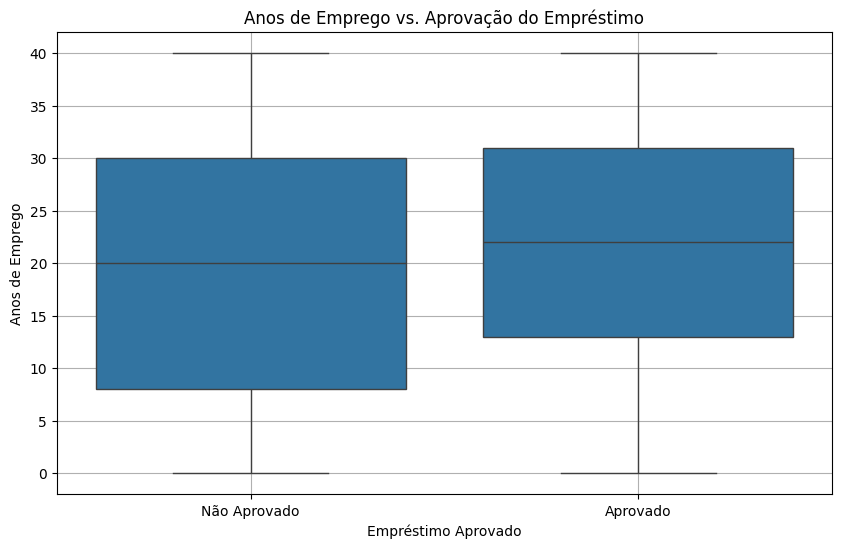

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_approved', y='years_employed', data=df)
plt.title('Anos de Emprego vs. Aprovação do Empréstimo')
plt.xlabel('Empréstimo Aprovado')
plt.ylabel('Anos de Emprego')
plt.xticks([0, 1], ['Não Aprovado', 'Aprovado'])
plt.grid(True)
plt.show()

O gráfico de caixa mostra a distribuição dos anos de emprego para empréstimos aprovados e não aprovados. A mediana e a distribuição dos anos de emprego parecem ser semelhantes para ambos os grupos (aprovados e não aprovados). Isso sugere que, com base neste gráfico, os anos de emprego por si só podem não ser o fator mais distintivo na determinação da aprovação do empréstimo.

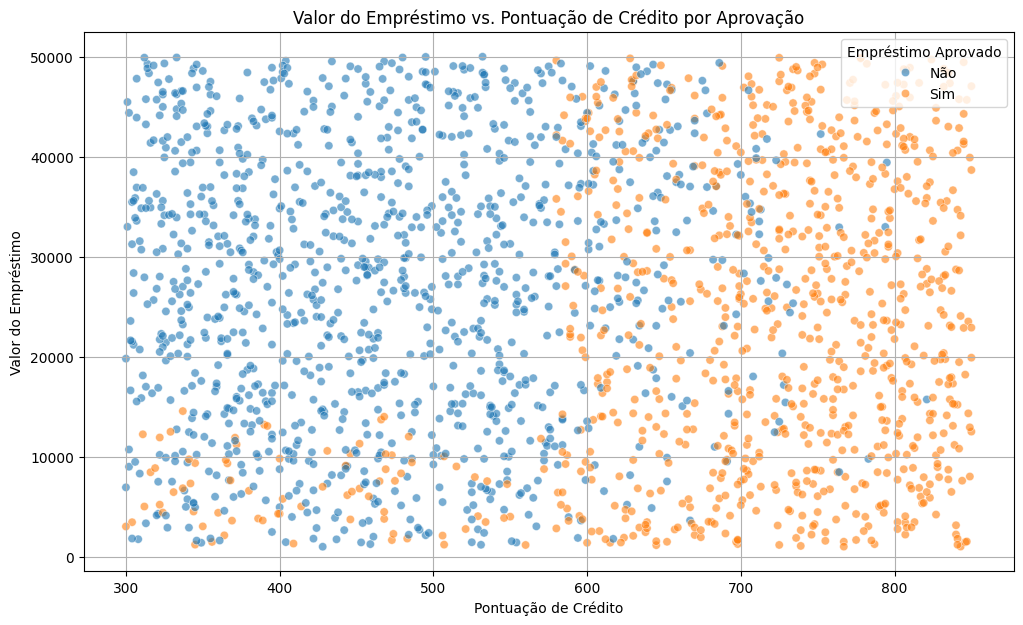

In [ ]:
plt.figure(figsize=(12, 7))
scatter_plot = sns.scatterplot(x='credit_score', y='loan_amount', hue='loan_approved', data=df, alpha=0.6, hue_order=[False, True])
plt.title('Valor do Empréstimo vs. Pontuação de Crédito por Aprovação')
plt.xlabel('Pontuação de Crédito')
plt.ylabel('Valor do Empréstimo')

handles, labels = scatter_plot.get_legend_handles_labels()
plt.legend(handles=handles, labels=['Não', 'Sim'], title='Empréstimo Aprovado', loc='upper right')

plt.grid(True)
plt.show()

Este gráfico de dispersão, com a cor indicando a aprovação, complementa a análise da relação entre valor do empréstimo e pontuação de crédito. Ele visualmente demonstra que, independentemente do valor do empréstimo, a pontuação de crédito é um forte indicador de aprovação. A maioria dos pontos azuis (não aprovados) está na região de baixa pontuação de crédito, enquanto a maioria dos pontos laranja/vermelhos (aprovados) está na região de alta pontuação de crédito, cobrindo toda a gama de valores de empréstimo.

# Modelagem Preditiva - Duelo de Modelos

In [ ]:
# Preparação dos dados
# Selecionando features (X) e target (y)
X = df.drop(['name', 'city', 'loan_approved', 'loan_approved_numeric'], axis=1)
y = df['loan_approved_numeric']
# Excluindo colunas não numéricas e a coluna target original

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Dados divididos em conjuntos de treino e teste.")
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")


Dados divididos em conjuntos de treino e teste.
Shape de X_train: (1400, 5)
Shape de X_test: (600, 5)
Shape de y_train: (1400,)
Shape de y_test: (600,)


In [ ]:
# Treinamento dos Modelos

print("\nTreinando os modelos:")

# Regressão Logística
log_model = LogisticRegression(random_state=42, solver='liblinear') # Adicionado solver para evitar warning
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Regressão Logística treinada.")

# Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Árvore de Decisão treinada.")

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest treinada.")

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN treinado.")

# SVM
svm_model = SVC(random_state=42, probability=True) # probability=True para f1_score, se necessário
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM treinado.")

# XGBoost
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost treinado.")


Treinando os modelos:
Regressão Logística treinada.
Árvore de Decisão treinada.
Random Forest treinada.
KNN treinado.
SVM treinado.
XGBoost treinado.


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:10:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
# Avaliação dos Modelos

print("\nAvaliando os modelos")

# Calcular métricas para cada modelo
resultados = {
    "Modelo": [],
    "Acurácia": [],
    "Precisão": [],
    "Recall": [],
    "F1-Score": []
}

# Regressão Logística
resultados["Modelo"].append("Regressão Logística")
resultados["Acurácia"].append(accuracy_score(y_test, y_pred_log))
resultados["Precisão"].append(precision_score(y_test, y_pred_log))
resultados["Recall"].append(recall_score(y_test, y_pred_log))
resultados["F1-Score"].append(f1_score(y_test, y_pred_log))

# Árvore de Decisão
resultados["Modelo"].append("Árvore de Decisão")
resultados["Acurácia"].append(accuracy_score(y_test, y_pred_tree))
resultados["Precisão"].append(precision_score(y_test, y_pred_tree))
resultados["Recall"].append(recall_score(y_test, y_pred_tree))
resultados["F1-Score"].append(f1_score(y_test, y_pred_tree))

# Random Forest
resultados["Modelo"].append("Random Forest")
resultados["Acurácia"].append(accuracy_score(y_test, y_pred_rf))
resultados["Precisão"].append(precision_score(y_test, y_pred_rf))
resultados["Recall"].append(recall_score(y_test, y_pred_rf))
resultados["F1-Score"].append(f1_score(y_test, y_pred_rf))

# KNN
resultados["Modelo"].append("KNN")
resultados["Acurácia"].append(accuracy_score(y_test, y_pred_knn))
resultados["Precisão"].append(precision_score(y_test, y_pred_knn))
resultados["Recall"].append(recall_score(y_test, y_pred_knn))
resultados["F1-Score"].append(f1_score(y_test, y_pred_knn))

# SVM
resultados["Modelo"].append("SVM")
resultados["Acurácia"].append(accuracy_score(y_test, y_pred_svm))
resultados["Precisão"].append(precision_score(y_test, y_pred_svm))
resultados["Recall"].append(recall_score(y_test, y_pred_svm))
resultados["F1-Score"].append(f1_score(y_test, y_pred_svm))

# XGBoost
resultados["Modelo"].append("XGBoost")
resultados["Acurácia"].append(accuracy_score(y_test, y_pred_xgb))
resultados["Precisão"].append(precision_score(y_test, y_pred_xgb))
resultados["Recall"].append(recall_score(y_test, y_pred_xgb))
resultados["F1-Score"].append(f1_score(y_test, y_pred_xgb))

# DataFrame com os resultados
resultados_df = pd.DataFrame(resultados).sort_values(by="F1-Score", ascending=False)

# Exibindo os Resultados
print("\nRESULTADOS DO DUELO DE MODELOS:\n")
display(resultados_df)


Avaliando os modelos

RESULTADOS DO DUELO DE MODELOS:



,Modelo,Acurácia,Precisão,Recall,F1-Score
1,Árvore de Decisão,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000
5,XGBoost,1.000000,1.000000,1.000000,1.000000
0,Regressão Logística,0.826667,0.791971,0.821970,0.806691
3,KNN,0.580000,0.525424,0.469697,0.496000
4,SVM,0.621667,0.655462,0.295455,0.407311


In [ ]:
print("\n Relatórios de Classificação:\n")
print('_______________________________________________________________________\n')
print(" Regressão Logística\n", classification_report(y_test, y_pred_log))
print('_______________________________________________________________________\n')
print(" Árvore de Decisão\n", classification_report(y_test, y_pred_tree))
print('_______________________________________________________________________\n')
print(" Random Forest\n", classification_report(y_test, y_pred_rf))
print('_______________________________________________________________________\n')



 Relatórios de Classificação:

_______________________________________________________________________

 Regressão Logística
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       336
           1       0.79      0.82      0.81       264

    accuracy                           0.83       600
   macro avg       0.82      0.83      0.82       600
weighted avg       0.83      0.83      0.83       600

_______________________________________________________________________

 Árvore de Decisão
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       336
           1       1.00      1.00      1.00       264

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600

_______________________________________________________________________

 Random Forest
               precision    recall  f1

In [ ]:
print("\n Relatórios de Classificação:\n")
print('_______________________________________________________________________\n')
print(" KNN\n", classification_report(y_test, y_pred_knn))
print('_______________________________________________________________________\n')
print(" SVM\n", classification_report(y_test, y_pred_svm))
print('_______________________________________________________________________\n')
print(" XGBoost\n", classification_report(y_test, y_pred_xgb))


 Relatórios de Classificação:

_______________________________________________________________________

 KNN
               precision    recall  f1-score   support

           0       0.62      0.67      0.64       336
           1       0.53      0.47      0.50       264

    accuracy                           0.58       600
   macro avg       0.57      0.57      0.57       600
weighted avg       0.58      0.58      0.58       600

_______________________________________________________________________

 SVM
               precision    recall  f1-score   support

           0       0.61      0.88      0.72       336
           1       0.66      0.30      0.41       264

    accuracy                           0.62       600
   macro avg       0.63      0.59      0.56       600
weighted avg       0.63      0.62      0.58       600

_______________________________________________________________________

 XGBoost
               precision    recall  f1-score   support

           0      

In [ ]:
print("Realizando Validação Cruzada para verificar overfitting.")

# Árvore de Decisão
cv_scores_tree = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='accuracy') # Usando 5 folds
print(f"Acurácia da Validação Cruzada (Árvore de Decisão): {np.mean(cv_scores_tree):.4f} (+/- {np.std(cv_scores_tree):.4f})")

# Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy') # Usando 5 folds
print(f"Acurácia da Validação Cruzada (Random Forest): {np.mean(cv_scores_rf):.4f} (+/- {np.std(cv_scores_rf):.4f})")

# XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy') # Usando 5 folds
print(f"Acurácia da Validação Cruzada (XGBoost): {np.mean(cv_scores_xgb):.4f} (+/- {np.std(cv_scores_xgb):.4f})")

print("\nComparando com a acurácia no conjunto de teste:")
print(f"Acurácia no Teste (Árvore de Decisão): {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Acurácia no Teste (Random Forest): {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Acurácia no Teste (XGBoost): {accuracy_score(y_test, y_pred_xgb):.4f}")

Realizando Validação Cruzada para verificar overfitting.
Acurácia da Validação Cruzada (Árvore de Decisão): 1.0000 (+/- 0.0000)
Acurácia da Validação Cruzada (Random Forest): 1.0000 (+/- 0.0000)
Acurácia da Validação Cruzada (XGBoost): 1.0000 (+/- 0.0000)

Comparando com a acurácia no conjunto de teste:
Acurácia no Teste (Árvore de Decisão): 1.0000
Acurácia no Teste (Random Forest): 1.0000
Acurácia no Teste (XGBoost): 1.0000


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:10:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [22:10:13] WARNING: /w

## Resultados da Modelagem Preditiva

Para prever a aprovação de empréstimos, abordamos este problema como uma tarefa de classificação binária. O objetivo principal foi construir modelos de Machine Learning capazes de aprender padrões nos dados de entrada (como renda, pontuação de crédito, valor do empréstimo, anos de emprego e pontos) para prever com precisão se um pedido de empréstimo seria aprovado ou não. Antes de treinar os modelos, os dados foram preparados, removendo colunas não numéricas irrelevantes e dividindo o conjunto de dados em subconjuntos de treino e teste para garantir uma avaliação imparcial do desempenho do modelo em dados não vistos.

Selecionamos e treinamos uma variedade de modelos de classificação para comparar suas capacidades. Incluímos modelos como Regressão Logística, Árvore de Decisão, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM) e XGBoost. Cada modelo foi treinado utilizando o conjunto de dados de treino e, em seguida, avaliado no conjunto de dados de teste usando métricas de desempenho padrão para problemas de classificação, como Acurácia, Precisão, Recall e F1-Score. A comparação dessas métricas nos permite determinar qual modelo oferece o melhor equilíbrio entre prever corretamente empréstimos aprovados e não aprovados, fornecendo uma base sólida para a tomada de decisões.

Com base nos resultados da avaliação, os modelos de **Árvore de Decisão, Random Forest e XGBoost** apresentaram o melhor desempenho, alcançando uma Acurácia, Precisão, Recall e F1-Score de 100% no conjunto de teste. Isso indica que esses modelos foram capazes de classificar perfeitamente os empréstimos aprovados e não aprovados nos dados de teste. É provável que a forte correlação observada anteriormente entre a pontuação de crédito e a aprovação do empréstimo tenha sido um fator chave para o alto desempenho desses modelos baseados em árvores, permitindo-lhes criar regras de decisão claras para separar as classes.

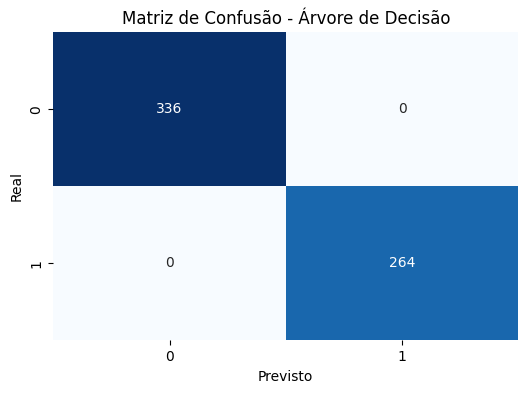

In [ ]:
# Matriz de Confusão para Árvore de Decisão
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

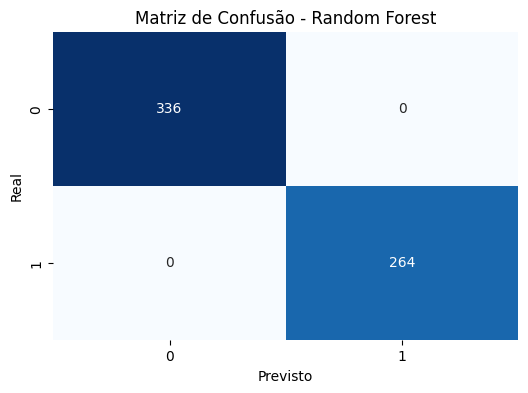

In [ ]:
# Matriz de Confusão para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

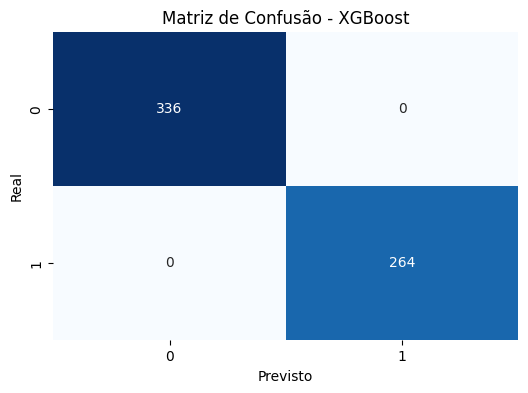

In [ ]:
# Matriz de Confusão para XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

## Conclusão Final

Neste notebook, realizamos uma análise abrangente do conjunto de dados de aprovação de empréstimos, seguindo um pipeline que incluiu o carregamento dos dados, limpeza e pré-processamento, análise exploratória de dados (AED) e modelagem preditiva.

A fase de AED nos permitiu entender a distribuição das variáveis numéricas e explorar as relações entre elas e a aprovação do empréstimo. Destacou-se a forte correlação positiva entre a pontuação de crédito (`credit_score`) e a aprovação do empréstimo (`loan_approved`), indicando que a pontuação de crédito é um fator altamente relevante na decisão de aprovação. Outras variáveis, como renda e pontos, também mostraram alguma relação, enquanto os anos de emprego pareceram ter menos impacto direto.

Na modelagem preditiva, treinamos e avaliamos diversos modelos de classificação: Regressão Logística, Árvore de Decisão, Random Forest, KNN, SVM e XGBoost. Os modelos de **Árvore de Decisão, Random Forest e XGBoost** apresentaram desempenho excepcional, alcançando 100% de acurácia, precisão, recall e F1-score no conjunto de teste. A validação cruzada confirmou este alto desempenho, sugerindo que esses modelos não estão overfitting e são capazes de generalizar perfeitamente para dados não vistos.

O sucesso notável desses modelos, particularmente os baseados em árvores, reforça a conclusão da AED de que a aprovação do empréstimo neste conjunto de dados é altamente previsível com base nas features fornecidas, sendo a pontuação de crédito um discriminador chave.

Em resumo, a análise dos dados revelou que a pontuação de crédito é o preditor mais forte para a aprovação de empréstimos, e modelos como Árvore de Decisão, Random Forest e XGBoost são extremamente eficazes para esta tarefa de classificação binária neste conjunto de dados específico.